# Лабораторная работа 2. Обучение с учителем. Задача регрессии
## Загрузка данных

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('D:/PythonWork/Machine learning and big data/data/taxi_duration_processed.csv', encoding='utf-8', delimiter=',')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,route_len,month,hour,week_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400,1.397743,2,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100,4.148155,3,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635,8.070991,2,17,6
3,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848,4.802338,2,6,2
4,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455,3.116996,2,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572663,id2031090,2,2016-01-25 22:31:56,2016-01-25 22:39:25,1,-73.974487,40.783138,-73.952629,40.772270,449,2.709620,1,22,0
572664,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,296,1.475886,5,13,5
572665,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,315,0.801741,2,0,0
572666,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,673,2.309847,4,18,4


In [6]:
data_float = data[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 
                   'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'route_len',
                   'month', 'hour', 'week_day']]
data_float

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,route_len,month,hour,week_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,1.397743,2,16,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,4.148155,3,23,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,8.070991,2,17,6
3,1,1,-74.017120,40.708469,-73.988182,40.740631,848,4.802338,2,6,2
4,2,2,-73.993614,40.751884,-73.995422,40.723862,1455,3.116996,2,18,6
...,...,...,...,...,...,...,...,...,...,...,...
572663,2,1,-73.974487,40.783138,-73.952629,40.772270,449,2.709620,1,22,0
572664,2,2,-73.965919,40.789780,-73.952637,40.789181,296,1.475886,5,13,5
572665,1,1,-73.996666,40.737434,-74.001320,40.731911,315,0.801741,2,0,0
572666,1,1,-73.997849,40.761696,-74.001488,40.741207,673,2.309847,4,18,4


## Выделение целевого признака и предикторов

In [7]:
y = data_float["trip_duration"]
x_simple = data_float[["week_day"]] # для простой линейной регрессии
X = data_float.drop(["trip_duration"], axis=1) # для множественной линейной регресии

y

0          400
1         1100
2         1635
3          848
4         1455
          ... 
572663     449
572664     296
572665     315
572666     673
572667     447
Name: trip_duration, Length: 572668, dtype: int64

In [8]:
x_simple

,week_day
0,0
1,4
2,6
3,2
4,6
...,...
572663,0
572664,5
572665,0
572666,4


In [9]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,month,hour,week_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,1.397743,2,16,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,4.148155,3,23,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,8.070991,2,17,6
3,1,1,-74.017120,40.708469,-73.988182,40.740631,4.802338,2,6,2
4,2,2,-73.993614,40.751884,-73.995422,40.723862,3.116996,2,18,6
...,...,...,...,...,...,...,...,...,...,...
572663,2,1,-73.974487,40.783138,-73.952629,40.772270,2.709620,1,22,0
572664,2,2,-73.965919,40.789780,-73.952637,40.789181,1.475886,5,13,5
572665,1,1,-73.996666,40.737434,-74.001320,40.731911,0.801741,2,0,0
572666,1,1,-73.997849,40.761696,-74.001488,40.741207,2.309847,4,18,4


## Разделение данных на обучающую и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((458134, 10), (458134,), (114534, 10), (114534,))

## Реализация линейной регрессии с помощью метода градиентного спуска

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler


class MyLinearRegressor:
    def __init__(self, learning_rate=0.001, n_iterations=500, lamb=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lamb = lamb
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.normal(0, 0.01, size=n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            l2_reg = self.lamb * self.weights

            self.weights -= self.learning_rate * (dw + 2 * l2_reg)
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(scaled_X, y, test_size=0.2)

## Простая линейная регрессия в sklearn
Обучим модель

In [12]:
from sklearn.linear_model import LinearRegression

xs_train, xs_test = x_simple[:len(y_train)], x_simple[len(y_train):len(y)]

slr = LinearRegression()
slr.fit(xs_train, y_train)

LinearRegression()

<Axes: xlabel='week_day', ylabel='trip_duration'>

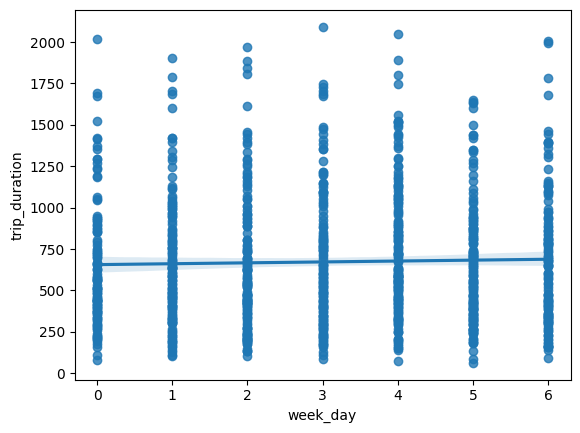

In [13]:
import seaborn as sns
sns.regplot(x = xs_train[:1000], y = y_train[:1000])

Рассмотрим метрики простой линейной регрессии

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

y_pred = slr.predict(xs_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {slr.score(xs_test, y_test)}')

MAE: 322.0486710011095
MSE: 162913.17084688353
RMSE: 403.62503743807014
MAPE: 0.8894127809592302
R^2: 4.1733862446990955e-06


Полученный коэффициент в простой модели

In [15]:
len(slr.coef_)
slr.coef_

array([0.28455338])

In [16]:
from sklearn.linear_model import Lasso, Ridge

# L2
def ridge_reg(xtr, ytr, xtst, ytst):
    ridge = Ridge(alpha=0.5).fit(xtr, ytr)
    y_pred = ridge.predict(xtst)
    print(f'MAE: {mean_absolute_error(ytst, y_pred)}')
    print(f'MSE: {mean_squared_error(ytst, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(ytst, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(ytst, y_pred))}')
    print(f'R^2: {ridge.score(xtst, ytst)}')
    ridge.coef_
    
ridge_reg(xs_train, y_train, xs_test, y_test)

MAE: 322.04867100124164
MSE: 162913.1708474353
RMSE: 403.6250374387537
MAPE: 0.8894127809592624
R^2: 4.173382857741714e-06


In [17]:
# L1
def lasso_reg(xtr, ytr, xtst, ytst):
    lasso = Lasso(alpha=0.5).fit(xtr, ytr)
    y_pred = lasso.predict(xtst)
    print(f'MAE: {mean_absolute_error(ytst, y_pred)}')
    print(f'MSE: {mean_squared_error(ytst, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(ytst, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(ytst, y_pred))}')
    print(f'R^2: {lasso.score(xtst, ytst)}')
    lasso.coef_
    
lasso_reg(xs_train, y_train, xs_test, y_test)

MAE: 322.0488836614461
MSE: 162914.12520231694
RMSE: 403.6262196665585
MAPE: 0.8894128328370418
R^2: -1.6846511721180235e-06


In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
    
def elastic_net_reg(xtr, ytr, xtst, ytst):
    base_elastic_model = ElasticNet(max_iter=100000)
    param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

    grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)
    
    grid_model.fit(xtr, ytr)
    y_pred = grid_model.predict(xtst)
    print(f'MAE: {mean_absolute_error(ytst, y_pred)}')
    print(f'MSE: {mean_squared_error(ytst, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(ytst, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(ytst, y_pred))}')
    print(f'R^2: {round(r2_score(ytst, y_pred), 2)}')
    
    print(f'Best params: {grid_model.best_params_}')
    
    
elastic_net_reg(xs_train, y_train, xs_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

<b>Вывод:</b> при помощи регуляризации L1 (Ridge) значения ошибок немного уменьшились, в то время как при L2 (Lasso) значения возрасли. Регуляризация ElasticNet уменьшила значения MAPE и R2.

## Подбор параметров 

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import optuna

parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': np.float64(0.30000000000000004)}

In [20]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': np.float64(0.30000000000000004)}

In [21]:
def objective_slr(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
    model = Ridge(alpha=alpha)

    # Обучаем модель
    model.fit(xs_train, y_train)

    # Предсказываем
    y_pred = model.predict(xs_test)

    # Вычисляем ошибки
    mse = mean_squared_error(y_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [22]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective_slr, n_trials=100)

# Выводим лучшие гиперпараметры
best_params = study.best_params
best_model = Ridge(alpha=best_params['alpha'])
best_model.fit(xs_train, y_train)

# Делаем предсказания на тестовом наборе
y_pred = best_model.predict(xs_test)

[I 2025-04-03 08:43:45,235] A new study created in memory with name: no-name-df1ec7fa-ea0a-4038-af17-7192385c0c9c
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\1873183981.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2025-04-03 08:43:45,265] Trial 0 finished with value: 162913.17084690375 and parameters: {'alpha': 0.01832895326928495}. Best is trial 0 with value: 162913.17084690375.
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\1873183981.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2025-04-03 08:43:45,290] Trial 1 finished with value: 162

In [23]:
from sklearn.metrics import r2_score

# Вычисляем R² и MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Лучшие гиперпараметры: alpha = {best_params['alpha']}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

Лучшие гиперпараметры: alpha = 1.668392024811295e-05
R²: 0.0000
MSE: 162913.1708


## Множественная линейная регрессия в sklearn 
Обучим модель

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression().fit(X_train, y_train)

Сделаем предсказание

In [25]:
lr.predict(X_test)

array([656.51619005, 655.04240802, 173.81709182, ..., 369.52170322,
       539.18083899, 994.45057549], shape=(114534,))

Проверим работу собственной модели

In [26]:
mylr = MyLinearRegressor()
mylr.fit(Xs_train, ys_train)
mylr.predict(Xs_test)

array([581.3759072 , 314.85653499, 683.02277495, ..., 369.20391288,
       324.23367524, 302.68129885], shape=(114534,))

C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\3285292427.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual weight')
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\3285292427.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: xlabel='trip_duration', ylabel='Density'>

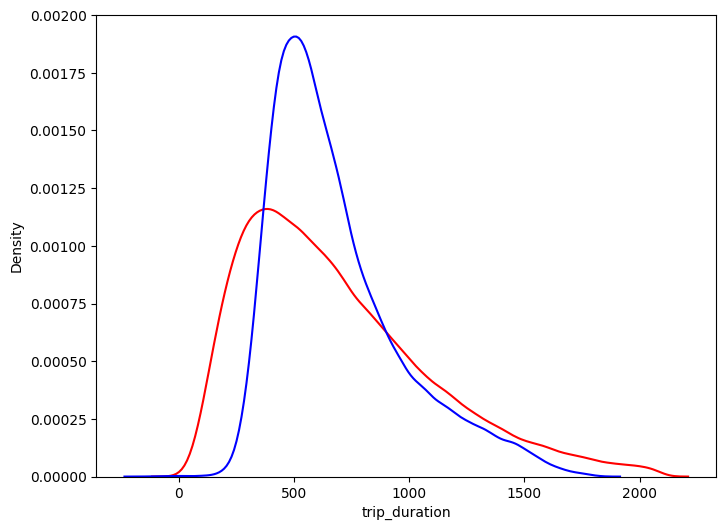

In [27]:
from matplotlib import pyplot as plt

# Давайте построим распределение Y и прогнозируемого Y
y_hat = lr.predict(X_test)

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual weight')
sns.distplot(y_hat, hist=False, color='Blue', ax=ax1, label='Predicted weight')

Заметим, что распределение прогнозируемых значений близко к распределению фактических значений, но есть возможности для улучшения.

C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\3322248037.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual weight')
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\3322248037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: xlabel='trip_duration', ylabel='Density'>

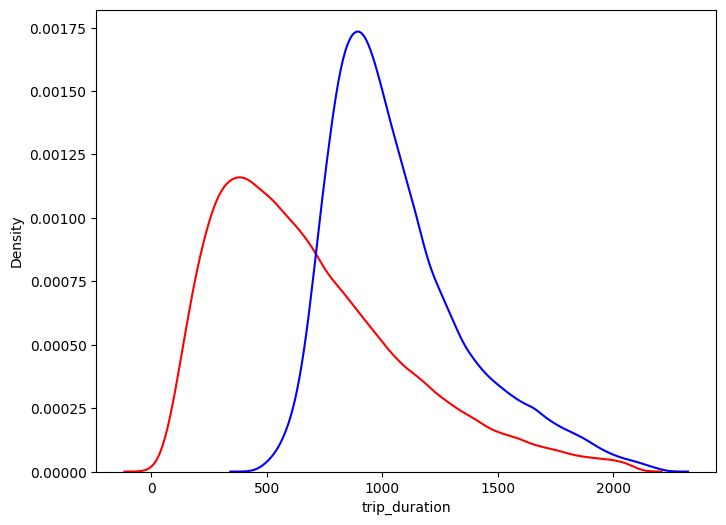

In [28]:
y_hat = mylr.predict(X_test)

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual weight')
sns.distplot(y_hat, hist=False, color='Blue', ax=ax1, label='Predicted weight')

По графику видно, что сделанная вручную модель работает значительно хуже встроенной

Рассмотрим метрики модели

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

y_pred = lr.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 213.5658262137887
MSE: 81049.94641998425
RMSE: 284.6927228082661
MAPE: 0.658845308214883
R^2: 0.502498123718748


Сравним результаты встроенных и написанных вручную функций ошибок 

In [30]:
import my_regression_errors as my_er

def get_MAE(y_test, y_pred):
    m = y_test.shape[0]
    mae = sum([abs(y_test_i - y_pred_i) for y_test_i, y_pred_i in zip(y_test, y_pred)]) / m
    return mae


def get_MSE(y_test, y_pred):
    if len(y_test) != len(y_pred):
        assert Exception("Test and predict samples must have the same dimension!")
    m = y_test.shape[0]
    mse = sum([(y_test_i - y_pred_i) ** 2 for y_test_i, y_pred_i in zip(y_test, y_pred)]) / m
    return mse


def get_RMSE(y_test, y_pred):
    return get_MSE(y_test, y_pred) ** 0.5


def get_MAPE(y_test, y_pred):
    if len(y_test) != len(y_pred):
        assert Exception("Test and predict samples must have the same dimension!")
    m = y_test.shape[0]
    mape = sum([abs(y_test_i - y_pred_i) / abs(y_test_i) for y_test_i, y_pred_i in zip(y_test, y_pred)]) / m * 100
    return mape


def get_R2(y_test, y_pred):
    if len(y_test) != len(y_pred):
        assert Exception("Test and predict samples must have the same dimension!")
    nom = sum([(y_test_i - y_pred_i) ** 2 for y_test_i, y_pred_i in zip(y_test, y_pred)])
    denom = sum([(y_test.mean() - y_test_i) ** 2 for y_test_i, y_pred_i in zip(y_test, y_pred)])
    r2 = 1 - nom / denom
    return r2

print(f'My MAE: {get_MAE(y_test, y_pred)}')
print(f'My MSE: {get_MSE(y_test, y_pred)}')
print(f'My RMSE: {get_RMSE(y_test, y_pred)}')
print(f'My MAPE: {get_MAPE(y_test, y_pred)}')
print(f'My R2: {get_R2(y_test, y_pred)}')

My MAE: 213.56582621378408
My MSE: 81049.94641998384
My RMSE: 284.6927228082654
My MAPE: 43.40771401567662
My R2: 0.5024981237187498


Значения совпали!
(MAPE выражено в процентах и без корня квадратного)

In [31]:
y_pred = mylr.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 431.86046933745916
MSE: 234372.14283053484
RMSE: 484.1199673949989
MAPE: 1.0613945708127375
R^2: 0.502498123718748


Значения ошибок в очередной раз показали, что собственная модель работает хуже

Полученные коэффициенты в модели (значения весов)

In [32]:
len(lr.coef_)
lr.coef_

array([-5.55114101e-02,  9.39767464e+00, -3.62972600e+02,  6.79760744e+02,
       -1.63854982e+03, -8.77721738e+02,  1.65976622e+02,  1.00626044e+01,
        3.62233230e+00, -1.14428086e+01])

Видим, что модель справилась неплохо. Применим регуляризации.

In [33]:
# L2
ridge_reg(X_train, y_train, X_test, y_test)

MAE: 213.56673505471133
MSE: 81049.65349517569
RMSE: 284.69220834995764
MAPE: 0.6588487754851099
R^2: 0.502499921753766


In [34]:
# L1
lasso_reg(X_train, y_train, X_test, y_test)

MAE: 214.82152236265935
MSE: 81718.11762726218
RMSE: 285.8638095794257
MAPE: 0.663188389590706
R^2: 0.4983967461857467


In [35]:
elastic_net_reg(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.1s
[CV] END ...........................alpha=0.1, l

<b>Вывод:</b> при помощи регуляризации L1 (Ridge) значения ошибок уменьшились, в то время как при L2 (Lasso) значения возрасли. Регуляризация ElasticNet уменьшила значения ошибок MAPE и R2.

## Подбор параметров 

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import optuna

parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': np.float64(0.30000000000000004)}

In [37]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': np.float64(0.30000000000000004)}

In [38]:
def objective_mlr(trial):
    # Определяем гиперпараметры
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
    model = Ridge(alpha=alpha)

    # Обучаем модель
    model.fit(X_train, y_train)

    # Предсказываем
    y_pred = model.predict(X_test)

    # Вычисляем ошибки
    mse = mean_squared_error(y_test, y_pred)
    return mse  # Возвращаем MSE для минимизации

In [39]:
# Настраиваем оптимизацию гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective_mlr, n_trials=100)

# Выводим лучшие гиперпараметры
best_params = study.best_params
best_model = Ridge(alpha=best_params['alpha'])
best_model.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе
y_pred = best_model.predict(X_test)

[I 2025-04-03 08:44:39,514] A new study created in memory with name: no-name-16a877a6-c8af-4292-b973-9bae97c35eed
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\207618963.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2025-04-03 08:44:39,603] Trial 0 finished with value: 81049.9462539057 and parameters: {'alpha': 0.0002720661260693017}. Best is trial 0 with value: 81049.9462539057.
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\207618963.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2025-04-03 08:44:39,666] Trial 1 finished with value: 81049.8

In [40]:
from sklearn.metrics import r2_score

# Вычисляем R² и MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Лучшие гиперпараметры: alpha = {best_params['alpha']}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

Лучшие гиперпараметры: alpha = 7.022612725867013
R²: 0.5025
MSE: 81047.9044


## Полиномиальная регрессия

Функция для построения графика:

In [41]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(min(independent_variable)*0.98, max(independent_variable)*1.01, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for trip duration')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Trip duration')

    plt.show()

Обучение (многочлен 5-й степени)

In [42]:
pol = np.polyfit(data_float['week_day'], data_float['trip_duration'], 5)
func = np.poly1d(pol)
print(func)

        5         4         3         2
0.2063 x - 3.292 x + 18.82 x - 55.53 x + 93.74 x + 647.5


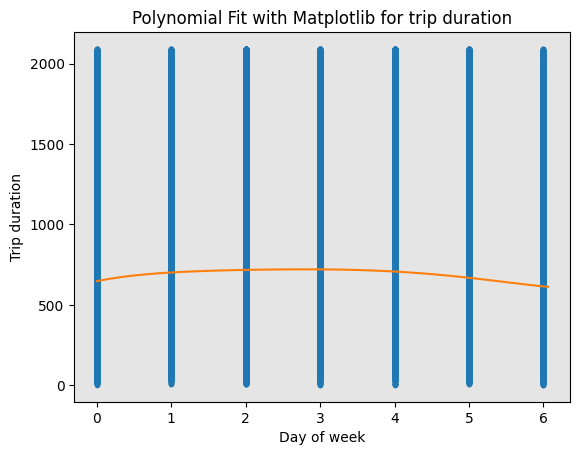

In [43]:
PlotPolly(func, data_float['week_day'], data_float['trip_duration'], 'Day of week')

Рассмотрим распределения для других признаков

         5         4         3         2
-0.1181 x + 2.732 x - 22.34 x + 59.77 x + 183.5 x + 140.6


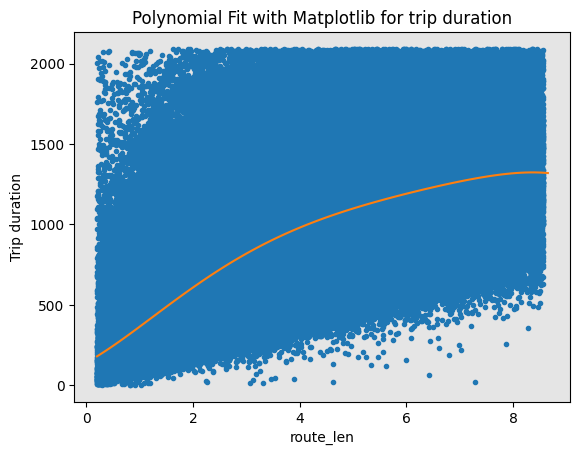

            5          4         3         2
-0.0006246 x + 0.0588 x - 1.884 x + 24.35 x - 104 x + 672.1


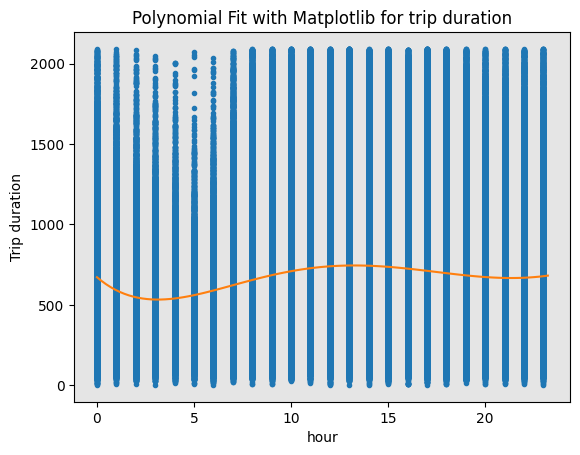

        5         4         3         2
0.8117 x - 13.99 x + 89.03 x - 256.4 x + 338.8 x + 497.3


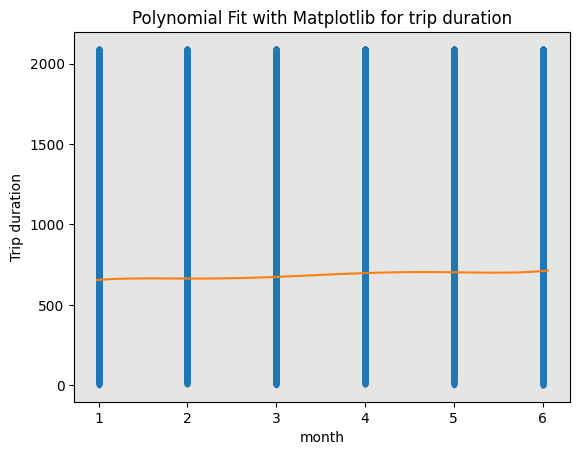

C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\1827461197.py:4: RankWarning: Polyfit may be poorly conditioned
  pol_loop = np.polyfit(data_float[x], data_float['trip_duration'], 5)


       5          4         3         2
1.341 x - 0.9733 x - 13.79 x - 21.11 x + 152.7 x + 561.8


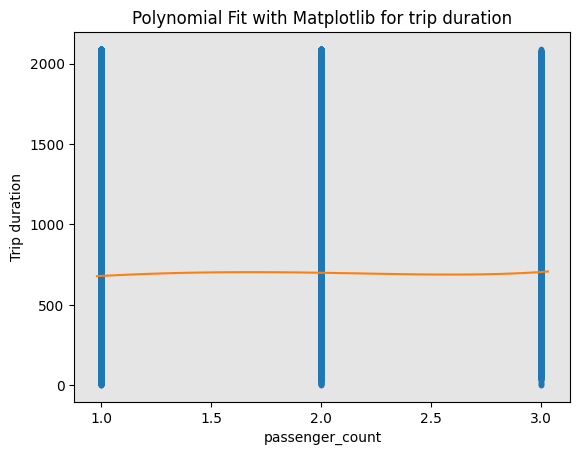

In [44]:
col_list = ['route_len', 'hour', 'month', 'passenger_count']

for x in col_list:
  pol_loop = np.polyfit(data_float[x], data_float['trip_duration'], 5)
  func_loop = np.poly1d(pol_loop)
  print(func_loop)
  plt.figure()
  PlotPolly(func_loop, data_float[x], y, Name=x)
  plt.show()

### Полиномиальное преобразование (Пайплайн)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_polF = data_float[col_list]

# Определить Input для pipeline
Input = [('standardscaler', StandardScaler()), 
         ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
         ('model', LinearRegression()) ]
pipe = Pipeline(Input)
pipe


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
pipe.fit(X_polF, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
Yhat_pipe = pipe.predict(X_polF)
Yhat_pipe[0:4]

array([ 496.3056162 ,  928.61685381, 1398.23043138, 1039.68729752])

Выясним, является ли модель регрессии полиномиальных признаков лучшей моделью.

C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\283120221.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y, hist=False, color='Red', label='Actual values')
C:\Users\sheld\AppData\Local\Temp\ipykernel_10324\283120221.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

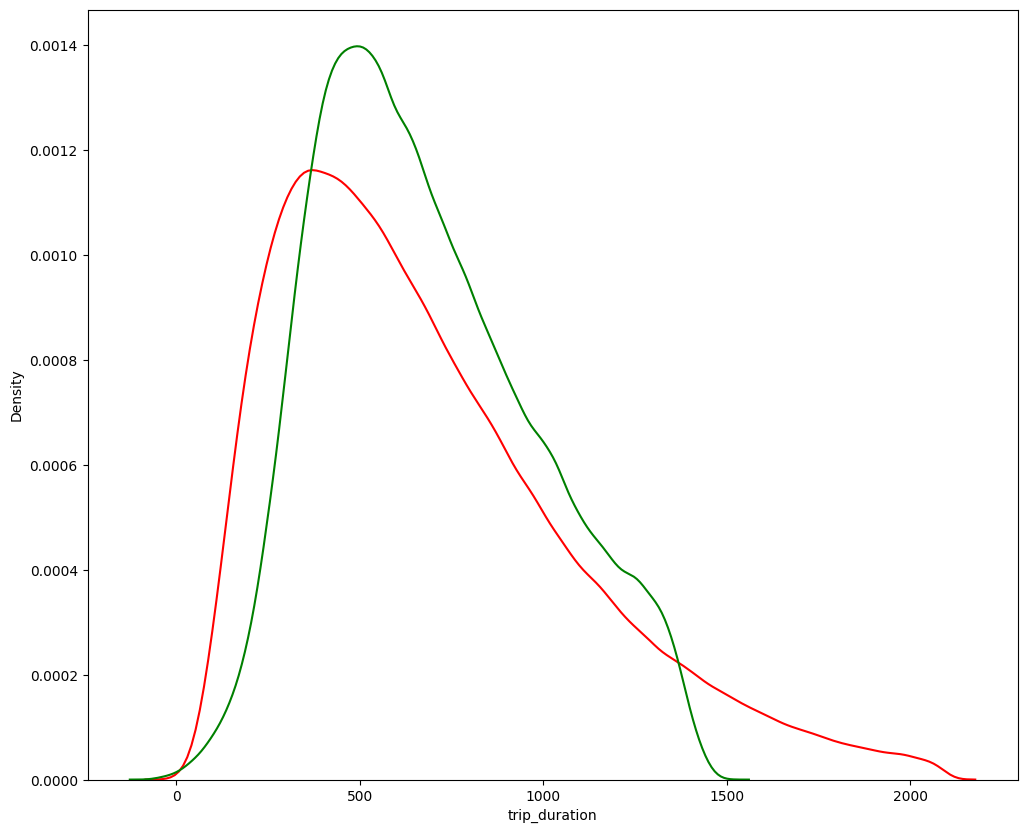

In [48]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y, hist=False, color='Red', label='Actual values')
sns.distplot(Yhat_pipe, hist=False, color='Green', label='Predicted values')
plt.show()

Как видно из распределения, ***модель регрессии полиномиальных признаков*** лучше отображает данные. 

Cделаем оценку модели

In [49]:
print("Mean Squared Error для Полиномиальной множественной линейной регрессии = ",
      mean_squared_error(y, Yhat_pipe), ' \nR^2 = ', r2_score(y, Yhat_pipe))

Mean Squared Error для Полиномиальной множественной линейной регрессии =  74248.66358012237  
R^2 =  0.5443206501436747


In [50]:
Y_pred = pd.DataFrame(data=Yhat_pipe, columns=['Estimate Weight'])
prediction_df = pd.concat([Y_pred, y], axis=1)
prediction_df

,Estimate Weight,trip_duration
0,496.305616,400
1,928.616854,1100
2,1398.230431,1635
3,1039.687298,848
4,856.400128,1455
...,...,...
572663,656.813546,449
572664,576.663337,296
572665,92.291985,315
572666,701.197944,673


**Выводы**:
</br> Среднеквадратическая ошибка (MSE) новой модели намного лучше, чем у предыдущих моделей, а показатель **R^2** (коэффициент детерминации) немного выше, чем у множественной линейной регрессии. Это означает, что модель способна довольно точно предсказать продолжительность поездки на такси, основываясь на различных факторах.

## Вывод:
Лучшей моделью, предсказывающей продолжительность поездки на такси, является полиномиальная регрессия, потому что у данной модели наименьшие значения ошибок и наибольшая точность предсказания значений.